# Part 0 - Importing Necessary Packages and Splitting the Data

## Importing Packages

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

## Reading the Dataset

In [6]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [7]:
# # Specify the path to your data file within your Google Drive
# file_path = '/content/drive/My Drive/Colab Notebooks/MSBA315/Data/data.csv'  # Update with your file path

# # Read the data file into a pandas DataFrame
# df_eCommerce = pd.read_csv(file_path)

In [8]:
data = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\01_Education\\02_AUB\\02_Spring2024\\MSBA315-Introduction to Python for Machine Learning\\Assignments\\Assignment5\\AssignmentFolder\\data\\data.csv')

In [9]:
#Checkin the Dataset
data.head()

,user_id,session_id,session_start_time,session_expiry_time,event_time,event_time_zone,event_type,page_type,offer_decline_count,user_status,cart_quantity,cart_total,cart_data,last_offer_type,last_reward_value,last_spend_value,offer_display_count,user_screen_size,offer_acceptance_state,total
0,222fd96a-707e-4d76-bc23-20c1a929f104,15d2414b-ebb7-44c5-9586-53b25bc9c94e,2019-11-19T03:48:19.642Z,2019-11-19T04:29:45.135Z,2019-11-19T04:00:03.064Z,300,PAGE_LOAD,ProductSubCategory,0,PBu,1,99.99,"[{'productCategory': 'Health & Fitness', 'quan...",F,5.0,50.0,8.0,1.047806e+06,IGNORED,99.99
1,1b119a0c-811a-490a-8efd-63058a02b4f5,b5b9ea60-a40e-4520-8b2e-a1f86a6a7759,2019-11-19T03:04:32.098Z,2019-11-19T04:29:42.465Z,2019-11-19T04:00:06.056Z,420,PAGE_LOAD,ProductDetailPage,0,PBr,1,29.99,"[{'productCategory': 'Electronics', 'quantity'...",S,5.0,50.0,1.0,1.000500e+06,IGNORED,79.98
2,95ce9e69-6e35-424e-8f07-70342caf3944,9d631534-129d-46c5-ba7a-ec7b11fa2fff,2019-11-19T04:00:19.832Z,2019-11-19T04:30:19.832Z,2019-11-19T04:00:19.066Z,480,PAGE_LOAD,Cart,0,PBu,1,39.99,"[{'productCategory': 'Kitchen', 'quantity': 1,...",C,5.0,50.0,1.0,2.767256e+06,IGNORED,39.99
3,779b3ab1-49d1-46a9-a0b1-8907c05d6f37,cd0da1ba-827b-4ea5-82db-8e43a4e07907,2019-11-19T03:28:37.061Z,2019-11-19T04:30:19.815Z,2019-11-19T04:00:27.369Z,300,PAGE_LOAD,Cart,0,PBu,1,19.99,"[{'productCategory': 'Health & Fitness', 'quan...",S,5.0,50.0,1.0,3.145728e+06,IGNORED,19.99
4,95ce9e69-6e35-424e-8f07-70342caf3944,9d631534-129d-46c5-ba7a-ec7b11fa2fff,2019-11-19T04:00:19.832Z,2019-11-19T04:30:20.213Z,2019-11-19T04:00:28.774Z,480,PAGE_LOAD,ProductDetailPage,0,PBu,1,39.99,"[{'productCategory': 'Kitchen', 'quantity': 1,...",C,5.0,50.0,1.0,2.767256e+06,IGNORED,39.99


## Converting Time Columns to DateTime Objects

In [10]:
# Convert object columns to datetime objects
data['session_start_time'] = pd.to_datetime(data['session_start_time'])
data['session_expiry_time'] = pd.to_datetime(data['session_expiry_time'])
data['event_time'] = pd.to_datetime(data['event_time'])
data['event_time_zone'] = data['event_time_zone'].astype('str')

The code snippet performs two operations:

1. It standardizes the event time zone as a string and converts specific columns in a pandas DataFrame to the appropriate datetime objects to facilitate time-based analysis. 

2. Once completed, the DataFrame is examined to verify that the data types have been updated accurately.

## Splitting the Dataset

In [11]:
train, valid = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)

# Part 1 - Exploratory Data Analysis (EDA)

## Dataset Summary

In [12]:
train.describe()

,offer_decline_count,cart_quantity,cart_total,last_reward_value,last_spend_value,offer_display_count,user_screen_size,total
count,1.431291e+06,1.431291e+06,1.431291e+06,1.371835e+06,1.371835e+06,1.371835e+06,1.431291e+06,1.431291e+06
mean,1.511992e-02,3.062400e+00,2.503982e+02,1.010574e+01,1.489294e+02,6.637488e+00,2.693571e+06,2.202783e+02
std,2.551536e-01,2.909070e+00,5.303425e+02,1.300756e+01,2.197271e+02,1.530284e+01,1.595908e+06,5.453448e+02
min,0.000000e+00,1.000000e+00,1.990000e+00,5.000000e+00,5.000000e+01,1.000000e+00,0.000000e+00,1.990000e+00
25%,0.000000e+00,1.000000e+00,7.498000e+01,5.000000e+00,5.000000e+01,1.000000e+00,1.995840e+06,8.450000e+01
50%,0.000000e+00,2.000000e+00,1.379700e+02,5.000000e+00,5.000000e+01,1.000000e+00,2.509056e+06,1.450000e+02
75%,0.000000e+00,4.000000e+00,2.500000e+02,1.000000e+01,1.750000e+02,5.000000e+00,3.240000e+06,2.379000e+02
max,4.300000e+01,1.130000e+02,6.318123e+04,1.000000e+02,2.000000e+03,3.180000e+02,3.317760e+07,1.979990e+05


From this table we notice that:

1. Offer_decline_count has a near-zero mean and standard deviation, meaning that the column is primarily made up of zeros and may not fluctuate significantly across the dataset. It may not provide much to a predictive model because of its lack of variation, so it can make sense to remove. 

2. There is more fluctuation in other variables, such as cart_quantity, cart_total, offer_display_count, last_spend_value, user_screen_size, and total, suggesting they would be more useful for the current prediction task.

## Calculating the Percentage of Missing Values in Each Column

In [13]:
# Calculate the total number of missing values per column
missing_values = train.isnull().sum()

# Calculate the total number of rows
total_rows = train.shape[0]

# Calculate the percentage of missing values per column
percentage_missing = (missing_values / total_rows) * 100

In [14]:
# Sort the percentage of missing values in ascending order
percentage_missing_sorted = percentage_missing.sort_values(ascending=False)

# Display the above results
print("Percentage of missing values in each column (in descending order):")
print(percentage_missing_sorted)

Percentage of missing values in each column (in descending order):
offer_acceptance_state    4.154012
offer_display_count       4.154012
last_spend_value          4.154012
last_reward_value         4.154012
last_offer_type           4.154012
user_id                   0.000000
session_id                0.000000
user_screen_size          0.000000
cart_data                 0.000000
cart_total                0.000000
cart_quantity             0.000000
user_status               0.000000
offer_decline_count       0.000000
page_type                 0.000000
event_type                0.000000
event_time_zone           0.000000
event_time                0.000000
session_expiry_time       0.000000
session_start_time        0.000000
total                     0.000000
dtype: float64


- The given code computes and arranges the proportion of absent values in every column of a DataFrame.

- The columns `offer_acceptance_state`, `offer_display_count`, `last_spend_value`, `last_reward_value`, and `last_offer_type` have an approximate 4.15% rate of missing values.

- All the remaining columns do not contain any missing data.

## Categorcal Variable Analysis

### Determening the Categorical Variables

In [15]:
#Determining which variables are categorical in the dataset
categorical_variables= ['event_type','page_type','user_status','last_offer_type','offer_acceptance_state']

### Bar Charts

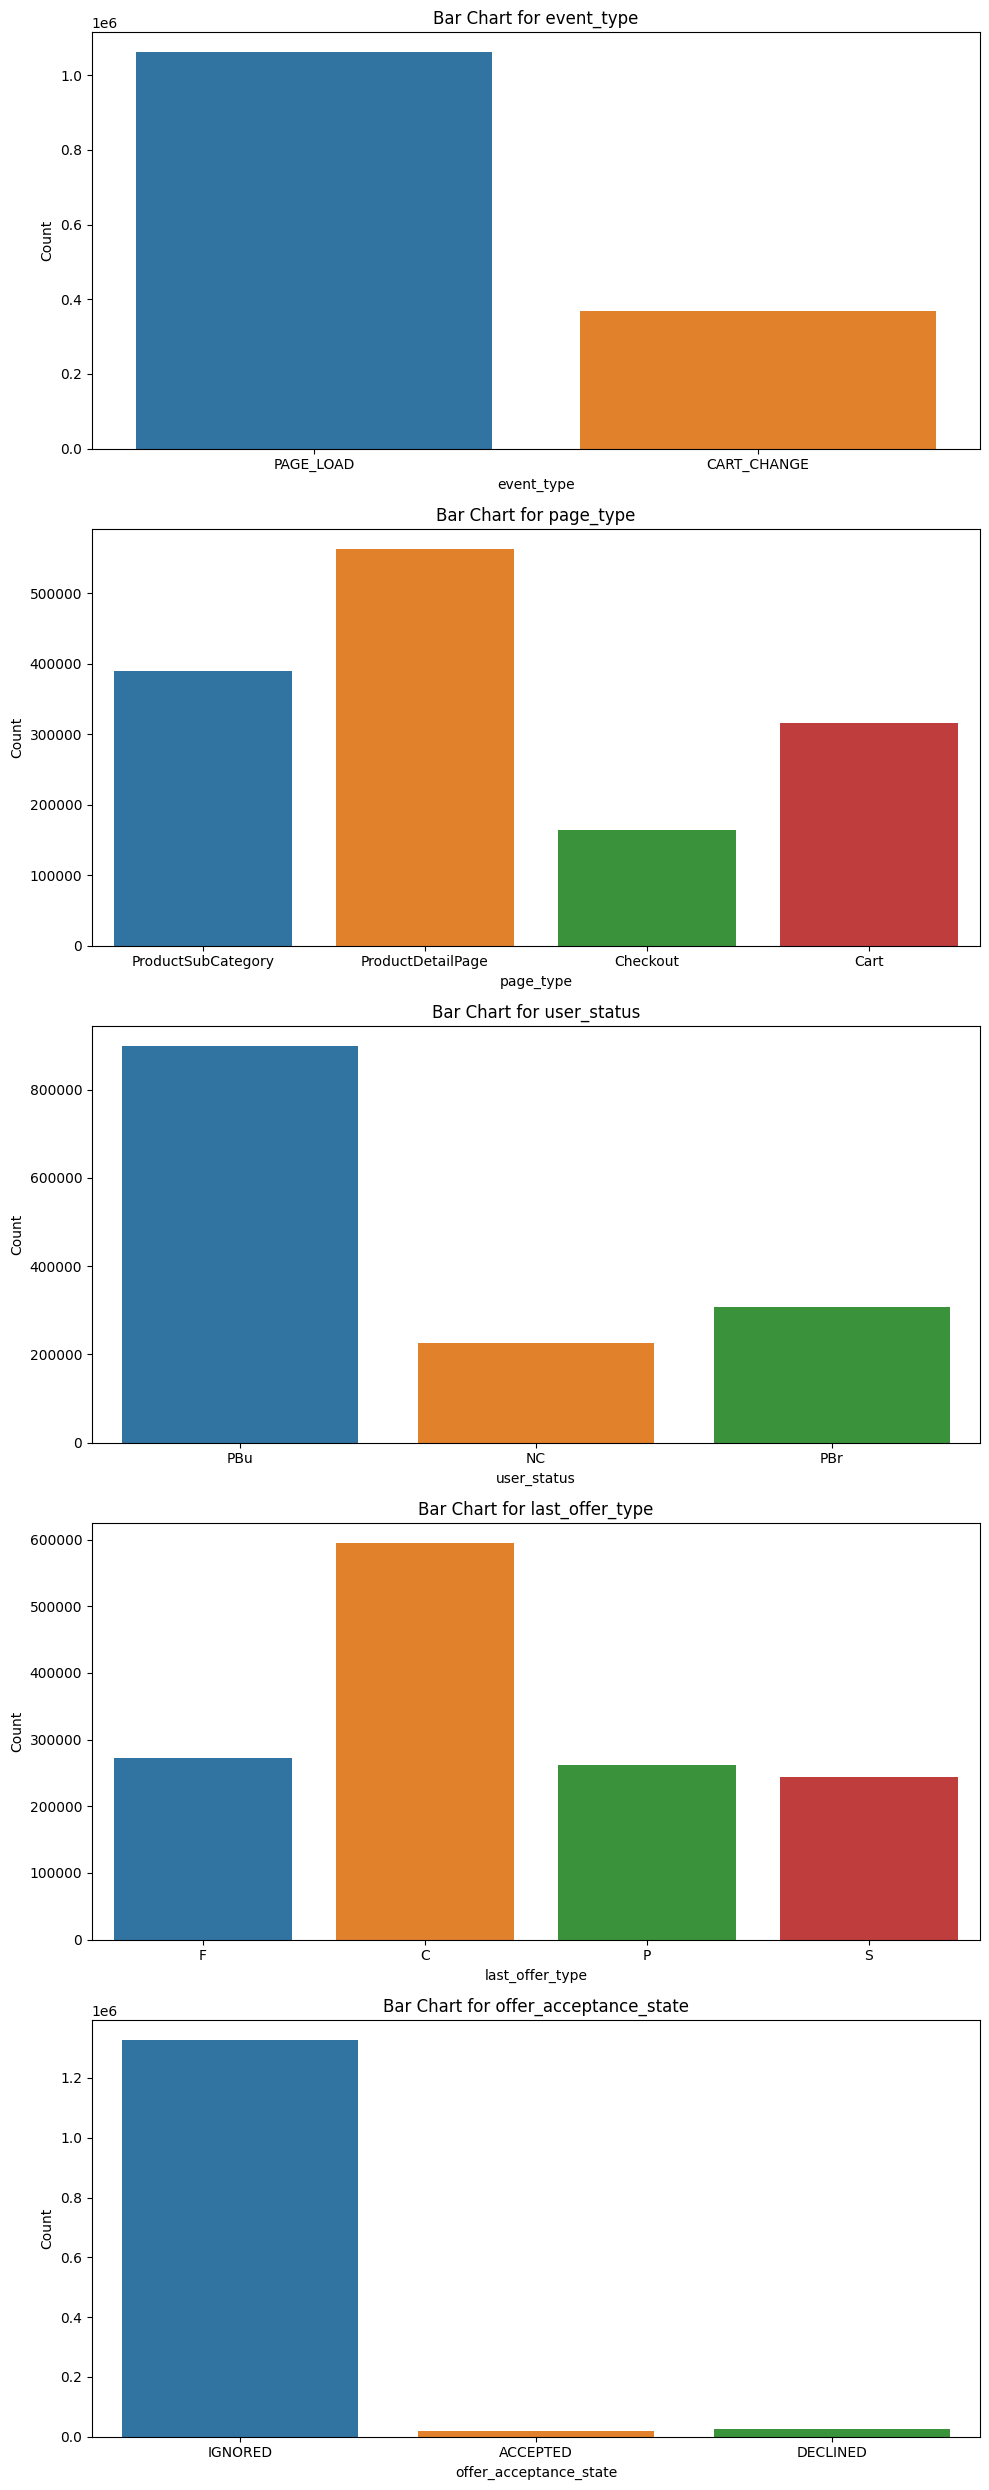

In [16]:
# Create subplots for each categorical variable
fig, axes = plt.subplots(len(categorical_variables), 1, figsize=(10, len(categorical_variables)*5))

# Create bar charts for each categorical variable
for i, cat_var in enumerate(categorical_variables):
    # Create a bar chart using Seaborn
    sns.countplot(x=cat_var, data=train, ax=axes[i])

    # Add title and labels
    axes[i].set_title(f'Bar Chart for {cat_var}')
    axes[i].set_xlabel(cat_var)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

* The first bar graph illustrates that the occurrence of CART_CHANGE events is comparatively lower in the dataset compared to PAGE_LOAD events, which are more prevalent.

* The second chart indicates that visits to ProductDetailPage are significantly more frequent than other page_type values. Following this, ProductSubCategory and Cart visits are next in frequency, while checkout pages are the least common.

* In contrast to NC (New Customer) and PBr (Prior Browser), which have lower representation, the third chart highlights that PBU (Prior Buyer) is the predominant user status in the dataset, indicating that the majority of users have made prior purchases.

* According to the fourth chart, the most common last_offer_type is 'C' (checkout-based discount), followed closely by 'F' (fixed offer), 'S' (spend-based discount), and 'P' (product-based discount).

* The final bar graph reveals that offers are primarily "IGNORED," with "ACCEPTED" and "DECLINED" offers being less frequent and very rare, respectively.

### Box Plots

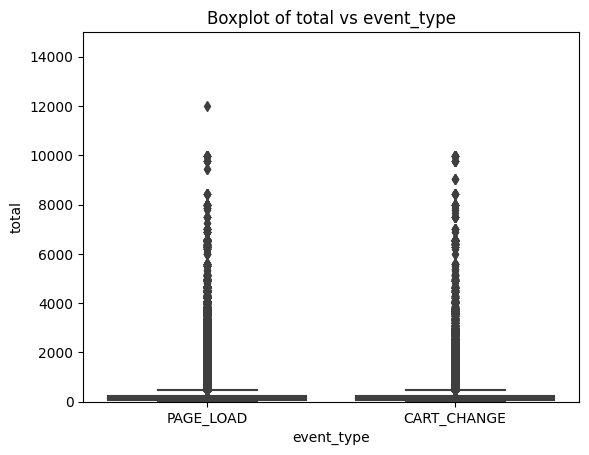

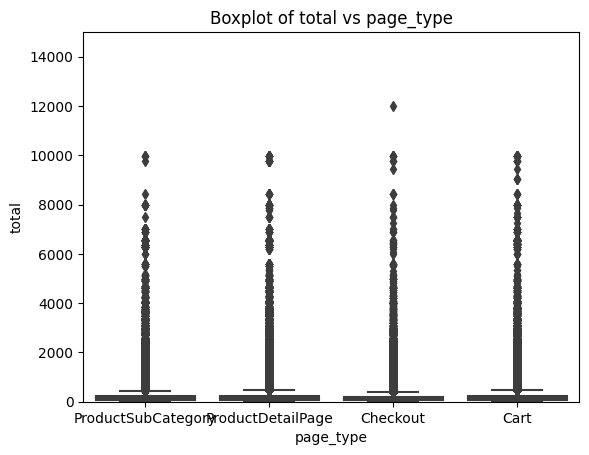

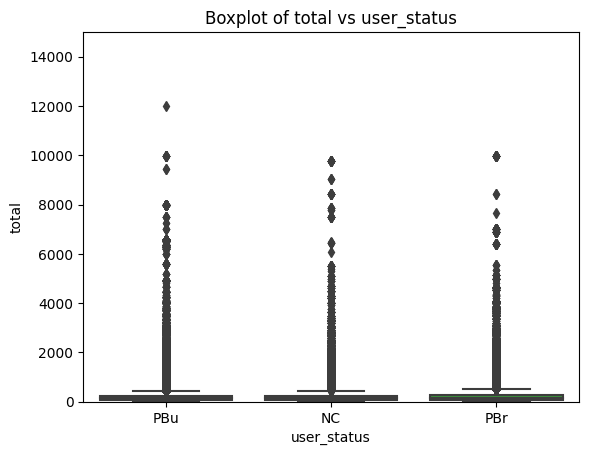

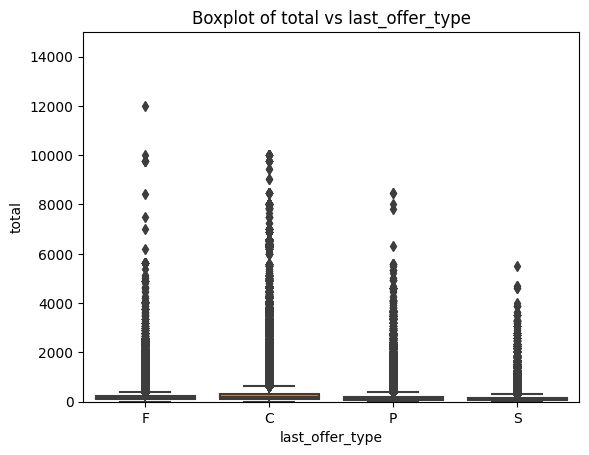

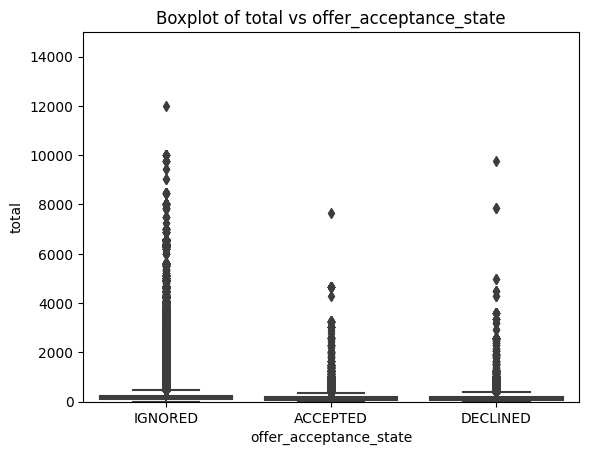

In [17]:
# Loop over categorical variables
for categ_var in categorical_variables:
    # Create a boxplot for the categorical variables
    sns.boxplot(x=categ_var, y='total', data=train)

    # Add title and labels
    plt.title(f'Boxplot of total vs {categ_var}')
    plt.xlabel(categ_var)
    plt.ylabel('total')
    plt.ylim(0, 15000)

    # Show the plot
    plt.show()

- Sessions containing a CART_CHANGE event or where offers are ignored, as well as sessions associated with prior buyers (PBu), tend to have higher spending totals.

- Similar to the "total" variable, the distribution pattern of this variable indicates a concentration of lower values (suggesting right-skewness) with occasional higher value outliers.

- Consequently, we need to visualize this variable differently to accurately represent its distribution because the presence of outliers is distorting the scale of the box plots.

#### Box Plots without Outliers

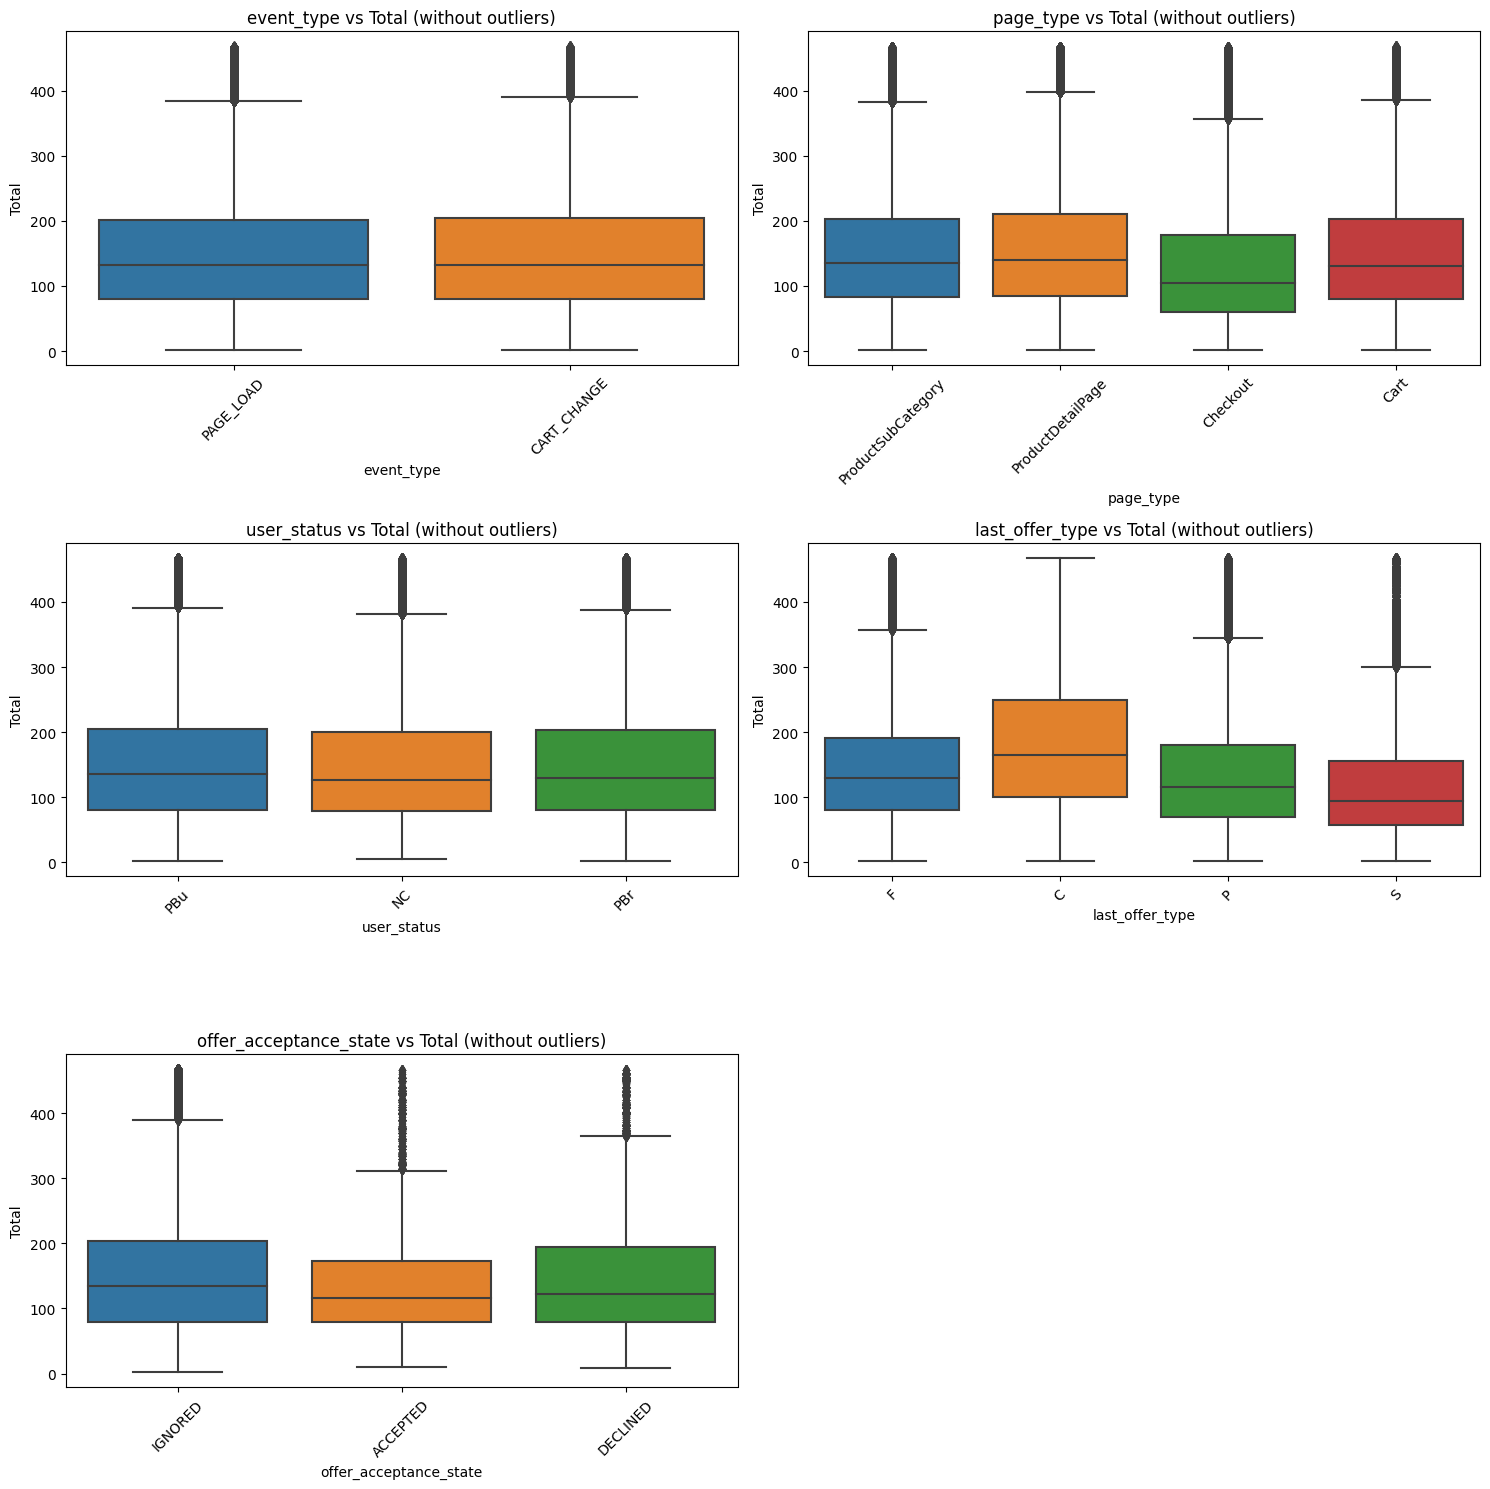

In [18]:
def remove_outliers(df, column):
    Q1 = train[column].quantile(0.25)
    Q3 = train[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train[(train[column] >= lower_bound) & (train[column] <= upper_bound)]

# Define categorical columns for plotting
num_rows = len(categorical_variables) // 2 + len(categorical_variables) % 2

# Create subplots with two plots per row
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))


# Flatten axes for easy iteration
axes = axes.flatten()

# Plot boxplots for each categorical column
for i, cat_col in enumerate(categorical_variables):
    # Remove outliers from 'total' column for each category
    train_no_outliers = remove_outliers(train, 'total')

    # Create boxplot for the subplot
    sns.boxplot(x=cat_col, y='total', data=train_no_outliers, ax=axes[i])
    axes[i].set_title(f'{cat_col} vs Total (without outliers)')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Total')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Since the number of categorical variables is odd, we remove the last subplot
if len(categorical_variables) % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust layout
plt.tight_layout()
plt.show()

- When comparing the event types PAGE_LOAD and CART_CHANGE, we notice that the boxplots of the 2 almost align with one another. This indicates that there is no significant relationship between the total spent and the event.

- Within the page_type category, the spending medians of ProductSubCategory and ProductDetailPage are similar, but Cart shows a wider range of expenditure, while Checkout has the lowest range. This indicates that final purchase amounts are typically lower at checkout, which is logical since the user will either keep his or her cart the same until checkout or they will remove some items from it.

- When comparing the user_status, we notice that the boxplots of the 3 almost align with one another. This indicates that there is no significant relationship between the total spent and the user_status.

- When comparing offer types, 'C' (Checkout-based discount) displays the highest median spend, followed by 'F' (Fixed offer) and 'P' (Product-price-based discount), while 'S' (Spend-based discount) shows the lowest median spend. This highlights the varying effects of offer types on total spending.

- The boxplot of offer_acceptance_state suggests shows slight variations. IGNORED offers have a somewhat higher median expenditure compared to ACCEPTED and DECLINED offers. However, the spending levels and variability of ACCEPTED and DECLINED offers are similar.


## Numerical Variable Analysis

### Determening the Numerical Variables

In [19]:
#Determining which variables are numerical in the dataset
numerical_variables=['session_start_time','session_expiry_time','event_time','cart_quantity','cart_total','last_reward_value','last_spend_value',
                     'offer_display_count','user_screen_size']

### Histograms (Distribution)

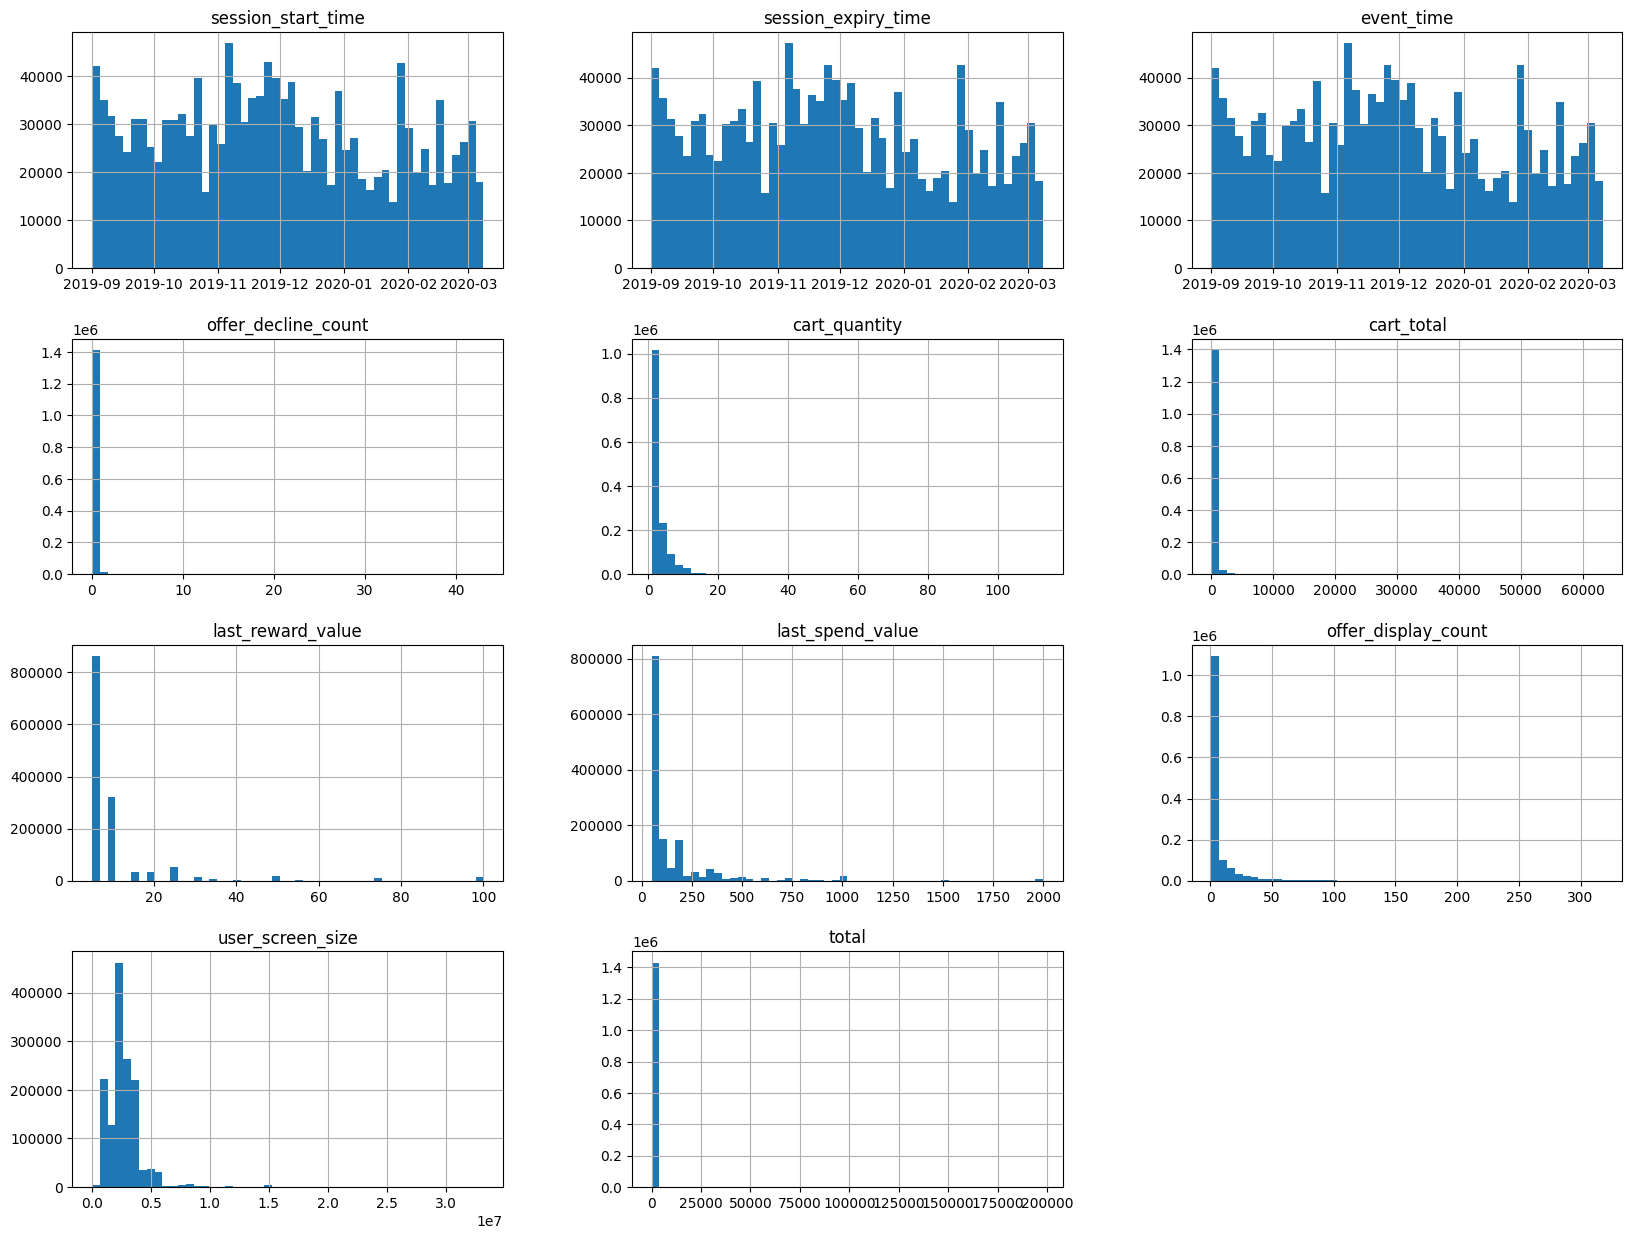

In [20]:
# Create histograms for all numerical variables in the 'train'
# Specify 50 bins for each histogram, The figure size is set to 20 by 15 inches
train.hist(bins=50, figsize=(20,15))

# Set the x-axis limit to 0 to 500 for the current Axes instance
plt.gca().set_xlim(0, 500)

# Display the resulting histograms
plt.show()

- Time series histograms of session_start_time, session_expiry_time, and event_time reveal a seasonal pattern, suggesting periodic increases in the number of users on the platform in session.

- Histograms of offer_decline_count, cart_quantity, cart_total, last_reward_value, last_spend_value, offer_display_count, and user_screen_size display are rightly-skewed, indicating that lower values are more frequent. This is especially true for offer_decline_count and offer_display_count as the values are close to zero This suggests that users typically do not reject numerous offers or decline them repeatedly during a session.

- Our target variable is also rightly-skewed indicating that most browsing sessions do not end up in high-value purchases. This aligns with typical e-commerce environments where the majority of sessions do not lead to substantial total expenditure. This is also related to the data itself as it is recoring the cart_total at every page of the website before checkout


### Scatter Plots

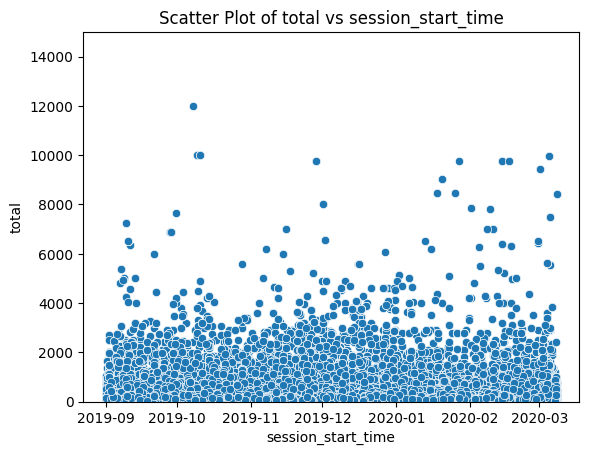

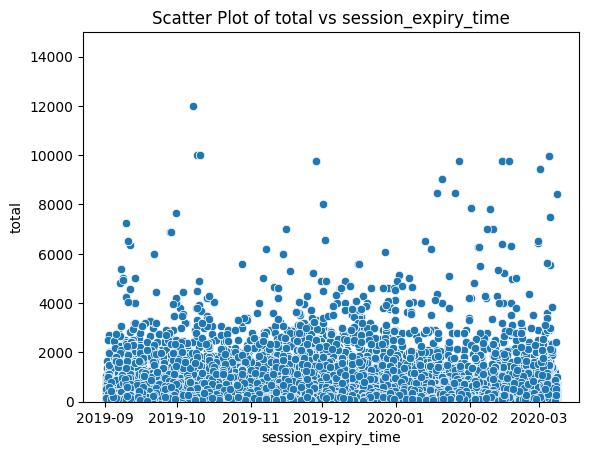

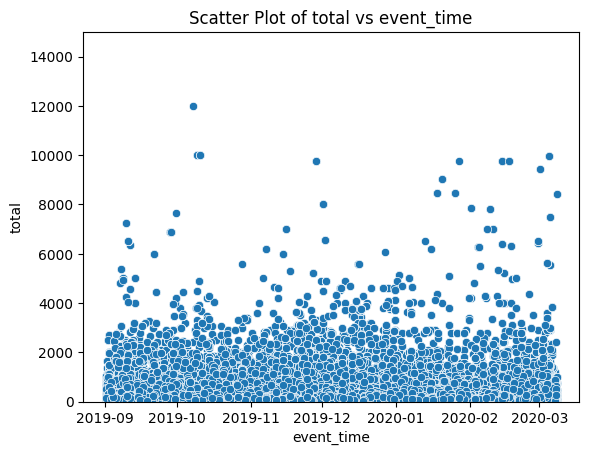

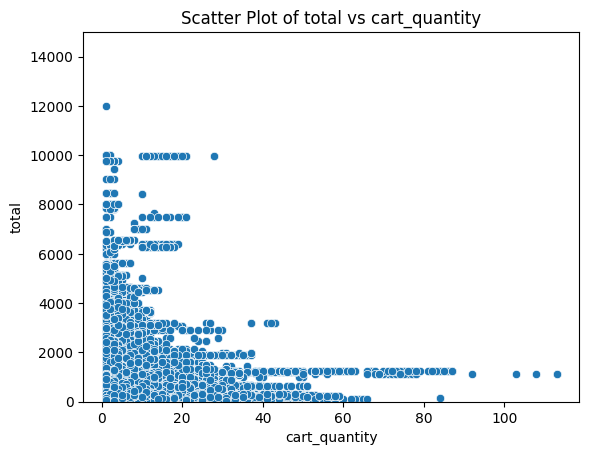

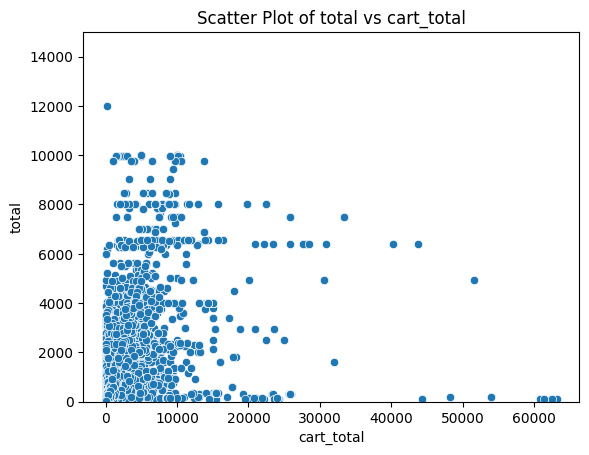

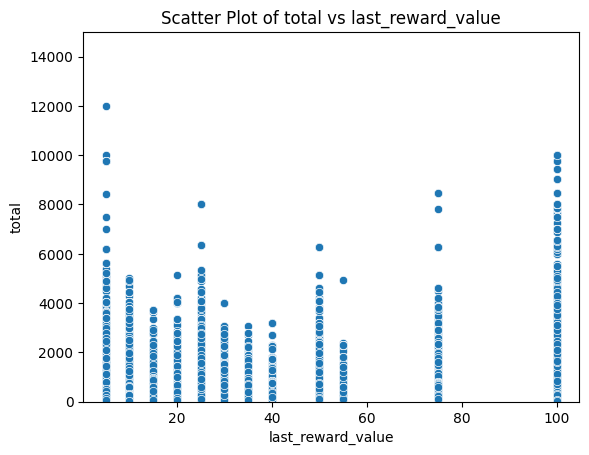

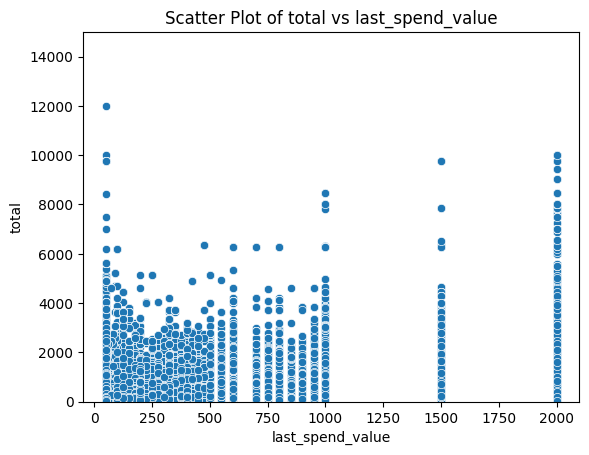

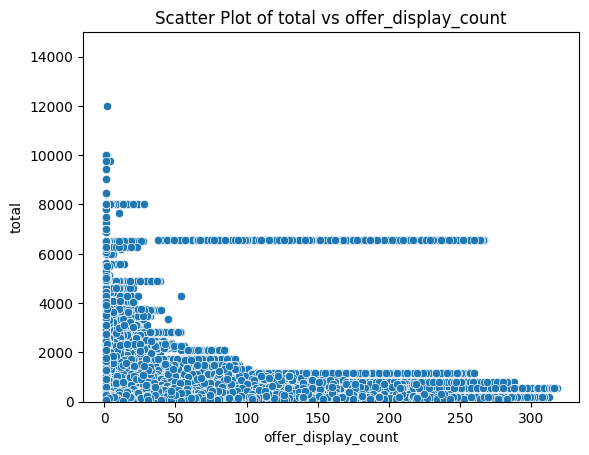

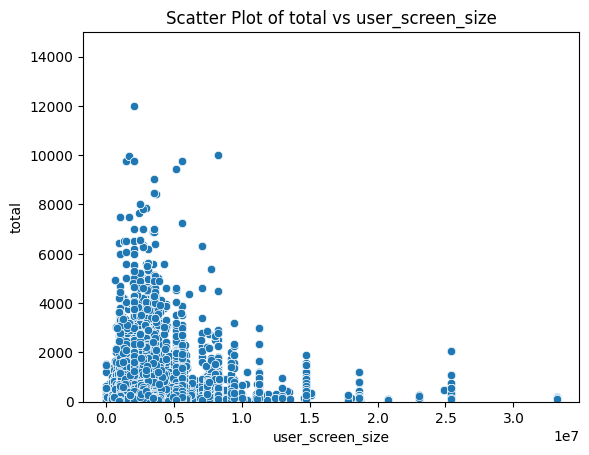

In [21]:
# Loop over numerical variables
for num_var in numerical_variables:
    # Create a scatter plot for the numerical variables
    sns.scatterplot(x=num_var, y='total', data=train)

    # Add title and labels
    plt.title(f'Scatter Plot of total vs {num_var}')
    plt.xlabel(num_var)
    plt.ylabel('total')
    plt.ylim(0, 15000)

    # Show the plot
    plt.show()

- **Total vs. Session Start Time:** The scatter plot suggests that there is not a clear relationship between the session start time and the total spent. however, it does indicate that most users end up spending low regardless of the time they start their session in.

- **Total Spending vs. Session End Time:** Similar to the start time scatter plot, this plot suggests that there is not a clear relationship between the session end time and the total spent. Meaning that session duration or expiry time does not significantly impact total spending.

- **Total vs. Event Time:** Similar to the start time and end time scatter plot, the event time plot is bound to follow the same trend as there is not a clear relationship between the event time and the total spent. However, the close grouping at the lower end of "total" spending across event times suggests that the spending is low on most sessions, which aligns with out previous observations.

- **Cart Quantity vs. Total:** This plot suggests that there is an inverse relationship between the cart_quantity and the total spent. This might be due to the fact that users with higher number of items in their cart would typically choose multiple cheap items whoch sometimes does not top 1 or 2 expensive items.

- **Cart Total vs. Total:** This plot shows that there is no clear relationship between the Cart Total and Total. This is due to the nature of the data as the cart total in any row is the cart price of the current cart. However, the target variable for every row is the total spent at checkout for a particular session, which is often a mistmatch with the cart total for that row

- **Last Reward Value vs. Total:** This plot shows that different specific reward values are associated with different spending amounts with slight to medium variability. However, this plot also shows that there might be a discrete amount of of reward values indicating that the e-commerce website does not offer much variety in their rewards.

- **Last Spend Value vs. Total:** This plost shows a slight relationship between the last spent value and the total spend. This suggests that having a higher thresholds to unlock rewards are slightly associated with a hhigher total spending, indicating that customers are usually primed into spending more by increasing the cost of the reward

- **Total Spending vs. Number of Offers Shown:** This plot suggests that there is an inverse relationship between the number of offers shown and the total spending and the total spent. Sessions with fewer offers shown tend to spend less overall. This can only be explained witht eh fact that fewer offers are normal for lower-spending sessions.

- **Total Spending vs. User Screen Size:** The scatter plot suggests that there is not a clear relationship between the user screen size and the total as spending varies significantly across screen sizes.

**Looking at all the numerical variables with the target, it does not seem that any of them have a linear relationship with teh total spent**

### Heatmap Analysis

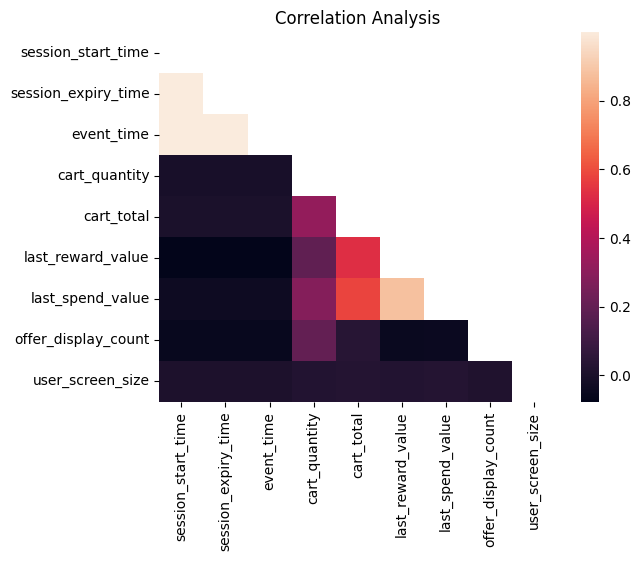

In [22]:
# Filter the DataFrame to include only numerical variables
numeric_columns = train[numerical_variables]

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
plt.figure(dpi=100)
sns.heatmap(corr_matrix, annot=False, mask=mask, lw=0, linecolor='white', fmt="0.2f")

# Add title and axis labels
plt.title('Correlation Analysis')
plt.axis('tight')

# Show the plot
plt.show()

Similar to the scatter plots, the correlation heatmap does not show any significant linear relationship between the variables. This indicates that there is no significant linear relationship between any of the numerical variables, especially with the target variable. Based on the scatter plot and the heatmap, we can assume that a linear model would not be a good fit for this dataset.

# Part 2 and 3 - Preprocessing Techniques and Feature Engineering for TRAIN data

## 1- Preprocessing Techniques (1)

### Removing Zero or Near Zero Columns

In [23]:
train.describe()

,offer_decline_count,cart_quantity,cart_total,last_reward_value,last_spend_value,offer_display_count,user_screen_size,total
count,1.431291e+06,1.431291e+06,1.431291e+06,1.371835e+06,1.371835e+06,1.371835e+06,1.431291e+06,1.431291e+06
mean,1.511992e-02,3.062400e+00,2.503982e+02,1.010574e+01,1.489294e+02,6.637488e+00,2.693571e+06,2.202783e+02
std,2.551536e-01,2.909070e+00,5.303425e+02,1.300756e+01,2.197271e+02,1.530284e+01,1.595908e+06,5.453448e+02
min,0.000000e+00,1.000000e+00,1.990000e+00,5.000000e+00,5.000000e+01,1.000000e+00,0.000000e+00,1.990000e+00
25%,0.000000e+00,1.000000e+00,7.498000e+01,5.000000e+00,5.000000e+01,1.000000e+00,1.995840e+06,8.450000e+01
50%,0.000000e+00,2.000000e+00,1.379700e+02,5.000000e+00,5.000000e+01,1.000000e+00,2.509056e+06,1.450000e+02
75%,0.000000e+00,4.000000e+00,2.500000e+02,1.000000e+01,1.750000e+02,5.000000e+00,3.240000e+06,2.379000e+02
max,4.300000e+01,1.130000e+02,6.318123e+04,1.000000e+02,2.000000e+03,3.180000e+02,3.317760e+07,1.979990e+05


Comment about the 'offer_decline_count' mean

In [24]:
#mean is approx to 0 in 'offer_decline_count"
train = train.drop('offer_decline_count', axis=1)
train=train.reset_index(drop=True)

From the train.describe function, we notice that the **offer_decline_count** has a mean and standard deviation close to zero. Meaning that this variable is likely to not affect the model in any way, which is why it was dropped

### Removing Null Values

In [25]:
#Calculate the total number of missing values per column
missing_values = train.isnull().sum()

#Calculate the total number of rows in the dataframe
total_rows = train.shape[0]

#Caluculate the percentage of missing values per column
percentage_missing = (missing_values/total_rows)*100

In [26]:
# Assuming 'data' is your DataFrame
train.dropna(thresh=data.shape[1]-1, inplace=True)

# Reset the index after dropping rows
train.reset_index(drop=True, inplace=True)
train=train.reset_index(drop=True)

Continuing with the preprocessing steps, missing values were identified for each column, and 4 columns in our dataset have 4.15% of their values missing.

To resolve this issue, all of the missing values were dropped from our training dataset, making it ready for further preprocessing.

### Removing Outliers

In [27]:
# Define the numerical variables
numerical_variables = ['cart_quantity', 'cart_total', 'last_reward_value', 'last_spend_value', 'user_screen_size']

# Initialize an empty dictionary to store outliers percentages
outliers_percentages = {}

# Loop over each numerical variable
for var in numerical_variables:
    # Calculate quartiles and IQR
    Q1 = train[var].quantile(0.25)
    Q3 = train[var].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outliers_count = ((train[var] < lower_bound) | (train[var] > upper_bound)).sum()

    # Calculate the total count of data points
    total_count = len(train[var])

    # Calculate the percentage of outliers
    outliers_percentage = (outliers_count / total_count) * 100

    # Store the outliers percentage in the dictionary with column name as key
    outliers_percentages[var] = outliers_percentage

    # Print the results
    print(f"Percentage of outliers for '{var}': {outliers_percentage:.2f}%")

# Print the dictionary containing outliers percentages for each variable
print("Outliers Percentages:")
print(outliers_percentages)

Percentage of outliers for 'cart_quantity': 4.52%
Percentage of outliers for 'cart_total': 9.28%
Percentage of outliers for 'last_reward_value': 11.01%
Percentage of outliers for 'last_spend_value': 8.25%
Percentage of outliers for 'user_screen_size': 6.23%
Outliers Percentages:
{'cart_quantity': 4.519931332849796, 'cart_total': 9.277136098729075, 'last_reward_value': 11.009560187631894, 'last_spend_value': 8.247930691373234, 'user_screen_size': 6.234131655774929}


In [28]:
# Loop over each numerical feature
for feature in numerical_variables:
    # Calculate quartiles and IQR for the current feature
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows with outliers in the current feature
    outliers_mask = (train[feature] < lower_bound) | (train[feature] > upper_bound)
    train = train.drop(train[outliers_mask].index)

# Reset index after dropping rows
train.reset_index(drop=True,inplace=True)

This code first calculates the percentage of outliers (based on IQR bounds) in all of the numerical variables. All the outliers were then dropped from our dataset.

It is important to note that the columns named 'cart_total' and 'last_reward_value' have the highest percentage of outliers.

### Removing Extreme Values in our Target Variable

In [29]:
train.describe()

,cart_quantity,cart_total,last_reward_value,last_spend_value,offer_display_count,user_screen_size,total
count,937794.000000,937794.000000,937794.000000,937794.000000,937794.000000,9.377940e+05,937794.000000
mean,2.346735,121.007415,6.331428,68.732051,6.535213,2.396623e+06,140.550920
std,1.531888,81.352958,2.355187,34.746820,13.324838,9.110040e+05,121.880257
min,1.000000,1.990000,5.000000,50.000000,1.000000,0.000000e+00,1.990000
25%,1.000000,59.990000,5.000000,50.000000,1.000000,1.679616e+06,70.120000
50%,2.000000,99.990000,5.000000,50.000000,1.000000,2.304000e+06,114.990000
75%,3.000000,159.960000,10.000000,75.000000,6.000000,3.145728e+06,175.360000
max,8.000000,469.970000,15.000000,175.000000,313.000000,5.032344e+06,11999.000000


In [30]:
# Filter rows where 'total' column is <= 3000
train = train[train['total'] <= 3000]

# Resetting the index after dropping rows
train.reset_index(drop=True, inplace=True)

In [31]:
train.describe()

,cart_quantity,cart_total,last_reward_value,last_spend_value,offer_display_count,user_screen_size,total
count,937658.000000,937658.000000,937658.000000,937658.000000,937658.000000,9.376580e+05,937658.000000
mean,2.346746,120.998461,6.331258,68.728796,6.534724,2.396579e+06,140.024157
std,1.531942,81.347163,2.355123,34.745336,13.324379,9.109684e+05,113.257004
min,1.000000,1.990000,5.000000,50.000000,1.000000,0.000000e+00,1.990000
25%,1.000000,59.990000,5.000000,50.000000,1.000000,1.679616e+06,70.080000
50%,2.000000,99.990000,5.000000,50.000000,1.000000,2.304000e+06,114.990000
75%,3.000000,159.960000,10.000000,75.000000,6.000000,3.145728e+06,175.310000
max,8.000000,469.970000,15.000000,175.000000,313.000000,5.032344e+06,2899.870000


Conforming with our EDA, we noticed that some values in the target variable are considered as extreme values, with the mean close to 140 while the maximum value is 197,000. These discrepancies might lead to large errors in our model.

To address this issue, all values in the target variable that are larger than 3000 were dropped.

## 2- Feature Engineering and Selection (1)

### Adding the Duration of each Session

In [32]:
# Group by 'session_id' and calculate the duration
session_durations = train.groupby('session_id').agg({
    'session_start_time': 'min',
    'session_expiry_time': 'max'
}).reset_index()

# Calculate the duration as the difference between the max expiry time and the min start time
session_durations['duration'] = session_durations['session_expiry_time'] - session_durations['session_start_time']

# Convert duration to a more convenient unit: minutes
session_durations['duration_minutes'] = session_durations['duration'].dt.total_seconds() / 60  # Convert seconds to minutes

# Round the duration_minutes column to 2 decimal places (nearest 0.01)
session_durations['duration_minutes'] = session_durations['duration_minutes'].round(2)

# Now merge this back into the original dataframe
train = train.merge(session_durations[['session_id', 'duration_minutes']], on='session_id', how='left')

# Verify the results
print(train[['session_id', 'session_start_time', 'session_expiry_time', 'duration_minutes']].head())

                             session_id               session_start_time  \
0  b87154bf-8f45-4dd7-b9b5-ebf963ae395f 2019-09-13 13:30:54.583000+00:00   
1  85f7eb65-77ef-4810-aba8-d7d9c2a7a018 2019-11-04 04:03:26.432000+00:00   
2  75a4b729-4453-4250-bf94-faf2b5fa2f2b 2019-09-22 15:26:33.649000+00:00   
3  f8160598-7fac-4134-bc23-ddd8dd08517e 2019-11-11 03:58:52.920000+00:00   
4  44529d77-a0ee-47a1-a81d-b298865f316e 2020-01-19 15:19:19.890000+00:00   

               session_expiry_time  duration_minutes  
0 2019-09-13 14:02:47.320000+00:00             36.88  
1 2019-11-04 05:26:02.682000+00:00            142.47  
2 2019-09-22 16:16:05.884000+00:00             51.28  
3 2019-11-11 04:41:38.438000+00:00             76.57  
4 2020-01-19 15:57:14.594000+00:00             42.57  


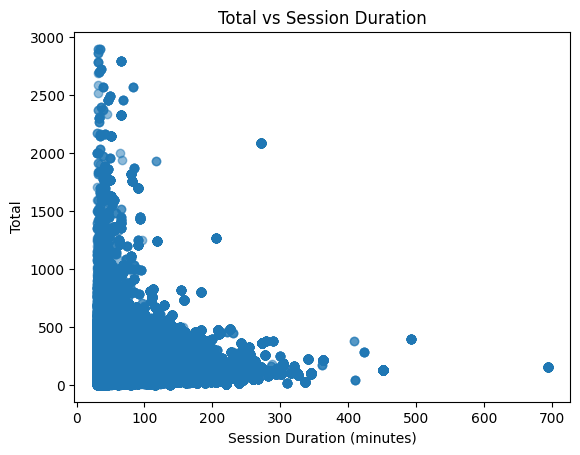

In [33]:
# Plot scatter plot of session duration against total
plt.scatter( train['duration_minutes'], train['total'], alpha=0.5)
plt.ylabel('Total')
plt.xlabel('Session Duration (minutes)')
plt.title('Total vs Session Duration')
plt.show()

In this step, we computed the duration in minutes of each code, meaning from the point where the user entered the website till his or her session ended, which takes up multiple rows in the dataset

A scatter plot was later added to feature the relationship between this newly added column and the target variable. we notice that there is a inverse relationship between the session duration and the target variable, meaning that people who spend less time on the website end up buying the most

### Extracting the year, month, day, hour, and day name from session_start_time

In [34]:
# Extract year, month, day, hour, and day name from session_start_time before normalizing
train['year'] = train['event_time'].dt.year
train['month'] = train['event_time'].dt.month
train['day'] = train['event_time'].dt.day
train['hour'] = train['event_time'].dt.hour  # Extract hour before normalizing
train['day_of_week'] = train['event_time'].dt.day_name()

# Now you have separate columns for year, month, day, hour, and day_of_week along with a combined string if needed
print(train[['year', 'month', 'day', 'hour', 'day_of_week']].head())

   year  month  day  hour day_of_week
0  2019      9   13    13      Friday
1  2019     11    4     4      Monday
2  2019      9   22    15      Sunday
3  2019     11   11     4      Monday
4  2020      1   19    15      Sunday


In this step, we performed basic feature extraction from the 'event_time' column

### Adding a Day Range based on the New 'day' column

In [35]:
# Function to categorize days with updated labels
def categorize_day(day):
    if 1 <= day <= 10:
        return 1  # Updated label for days 1-10
    elif 11 <= day <= 21:
        return 2  # Updated label for days 11-21
    else:
        return 3  # Updated label for days 22-31

# Apply the updated function to the 'day' column to create a new 'day_range' column with numerical labels
train['day_range'] = train['day'].apply(categorize_day)

# Display the first few rows to verify the new column
print(train[['year', 'month', 'day', 'day_range', 'hour', 'day_of_week']].head())

   year  month  day  day_range  hour day_of_week
0  2019      9   13          2    13      Friday
1  2019     11    4          1     4      Monday
2  2019      9   22          3    15      Sunday
3  2019     11   11          2     4      Monday
4  2020      1   19          2    15      Sunday


As an additional step, we added a new column named 'day_range' that indicate in whoch third of the month the session was done

In [36]:
# Assuming train is your DataFrame with 'event_time' column already converted to datetime
train['year'] = train['event_time'].dt.year.astype(str)
train['month'] = train['event_time'].dt.month.astype(str)
train['day'] = train['event_time'].dt.day.astype(str)
train['hour'] = train['event_time'].dt.hour.astype(str)
train['day_range'] = train['day_range'].astype(str)

#dropping irrelevant columns
train.drop(columns='day', axis=1, inplace=True)
train = train.drop(columns=['session_start_time', 'session_expiry_time', 'event_time'])

In this step, we converted the newly added columns into string, and we dropped the **'session_start_time', 'session_expiry_time', 'event_time'** as they ar enow now become redundant columns.

### Creating User Screen Size Categories

In [37]:
# Remove rows where "user_screen_size" is under 300,000
train = train[train["user_screen_size"] >= 300000]

# Categorize "user_screen_size" into 'Mobile phones' and 'Laptops'
train['User Screen Category'] = train['user_screen_size'].apply(lambda x: 'Mobile phones' if x < 4300000 else 'Laptops')

train.drop(columns='user_screen_size', inplace=True)

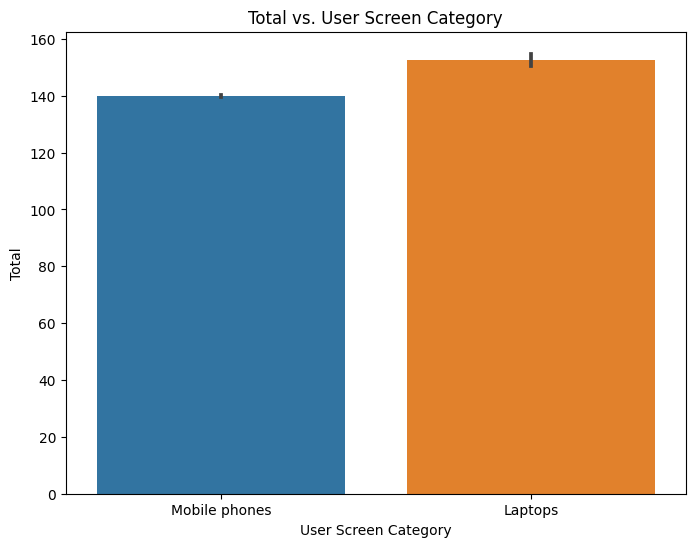

In [38]:
# Plot bar plot for User Screen Category
plt.figure(figsize=(8, 6))
sns.barplot(x='User Screen Category', y='total', data=train, order=['Mobile phones', 'Laptops'])
plt.title('Total vs. User Screen Category')
plt.xlabel('User Screen Category')
plt.ylabel('Total')
plt.show()

In this step, we noticed that having the pixel count of the device is not that informative and too precise. Therefore, this columns was converted to a categorical varibale with 2 types of devices: 'Mobile phones' and 'Laptops'

### Removing more Unecessecary Columns

In [39]:
train.drop(columns=['user_id','session_id', 'cart_data'], inplace=True) 

Comment

## 3- Preprocessing Techniques (2)

### Determening the Numerical and the Categorical columns

In [40]:
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns
# Exclude the column named "total"
numerical_cols = numerical_cols[numerical_cols != 'total']
categorical_cols = train.select_dtypes(include=['object', 'category']).columns
print(numerical_cols)
print(categorical_cols)

Index(['cart_quantity', 'cart_total', 'last_reward_value', 'last_spend_value',
       'offer_display_count', 'duration_minutes'],
      dtype='object')
Index(['event_time_zone', 'event_type', 'page_type', 'user_status',
       'last_offer_type', 'offer_acceptance_state', 'year', 'month', 'hour',
       'day_of_week', 'day_range', 'User Screen Category'],
      dtype='object')


### Normalizing the Numerical Columns

In [41]:
# Extract the numerical columns from the train DataFrame
numerical_df = train[numerical_cols].copy()

# Convert integer variables to floats
numerical_df = numerical_df.astype(float)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical columns
numerical_df_normalized = pd.DataFrame(scaler.fit_transform(numerical_df), columns = numerical_cols)

### One Hot Encoding the Categorical Variables

In [42]:
# Step 1: Create a new DataFrame with selected categorical variables
categorical_df = train[categorical_cols].copy()

In [43]:
# Step 1: Initialize OneHotEncoder
encoder = OneHotEncoder()

# Step 2: Fit and transform the data
categorical_df_encoded = encoder.fit_transform(categorical_df)

# Step 3: Convert the encoded data to a DataFrame
categorical_df_encoded = pd.DataFrame(categorical_df_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_df.columns))

# 'categorical_df_encoded' is your new DataFrame with one-hot encoded categorical features

### Joining the Preprocessed Numerical and Categorical columns

In [44]:
final_df = pd.concat([numerical_df_normalized, train['total'], categorical_df_encoded], axis=1)

In [45]:
final_df.shape

(937658, 91)

In this section, we normalized the numerical variables except the target variable, and we added them new dataframe of the normalized variables.

We then encoded the categorical variables and added them to new dataframe.

We then joined the 2 dataframes into one final dataframe.

### Dropping NA values in the Preprocessed Training Data

In [46]:
final_df.dropna(inplace=True)

In [47]:
final_df.isnull().sum()

cart_quantity                         0
cart_total                            0
last_reward_value                     0
last_spend_value                      0
offer_display_count                   0
                                     ..
day_range_1                           0
day_range_2                           0
day_range_3                           0
User Screen Category_Laptops          0
User Screen Category_Mobile phones    0
Length: 91, dtype: int64

In [48]:
# Remove rows with NaN values directly from final_df
final_df.dropna(inplace=True)

# Display the number of NaN values in the cleaned DataFrame
print("Number of NaN values after cleaning:", final_df.isnull().sum().sum())

# Check the shape of the cleaned DataFrame
print("Shape of cleaned DataFrame:", final_df.shape)

Number of NaN values after cleaning: 0
Shape of cleaned DataFrame: (937098, 91)


# Part 2 and 3 - Preprocessing Techniques and Feature Engineering for TEST data

For the preprocessing and feature engineering of the Test data, we applied the same steps and technoques to ensure consistency between the train and test data sets.

## 1- Preprocessing Techniques (1)

### Removing Zero or Near Zero Columns

In [49]:
valid = valid.reset_index(drop=True)
valid = valid.drop('offer_decline_count', axis=1)

### Removing Null Values

In [50]:
valid.dropna(thresh=valid.shape[1]-1, inplace=True)
valid.reset_index(drop=True, inplace=True)

In [51]:
# Count the number of missing values in the 'total' column
missing_values_count = valid['total'].isnull().sum()

# Calculate the total number of samples in the 'total' column
total_samples = len(valid['total'])

# Calculate the percentage of missing values
percentage_missing_values = (missing_values_count / total_samples) * 100

print("Percentage of missing values in 'total':", percentage_missing_values)

Percentage of missing values in 'total': 0.0


## 2- Feature Engineering and Selection

### Adding the Duration of each Session to Data

In [52]:
# Group by 'session_id' and calculate the duration
session_durations_valid = valid.groupby('session_id').agg({
    'session_start_time': 'min',
    'session_expiry_time': 'max'
}).reset_index()

# Calculate the duration as the difference between the max expiry time and the min start time
session_durations_valid['duration'] = session_durations_valid['session_expiry_time'] - session_durations_valid['session_start_time']

# Convert duration to minutes
session_durations_valid['duration_minutes'] = session_durations_valid['duration'].dt.total_seconds() / 60
session_durations_valid['duration_minutes'] = session_durations_valid['duration_minutes'].round(2)


# Merge back into the original dataframe
valid = valid.merge(session_durations_valid[['session_id', 'duration_minutes']], on='session_id', how='left')

### Extracting the year, month, day, hour, and day name from event_time

In [53]:
# Extract year, month, day, hour, and day name from event_time before normalizing
valid['year'] = valid['event_time'].dt.year.astype(str)
valid['month'] = valid['event_time'].dt.month.astype(str)
valid['day'] = valid['event_time'].dt.day
valid['hour'] = valid['event_time'].dt.hour.astype(str)
valid['day_of_week'] = valid['event_time'].dt.day_name()

# Now you have separate columns for year, month, day, hour, and day_of_week along with a combined string if needed
print(valid[['year', 'month', 'day', 'hour', 'day_of_week']].head())

   year month  day hour day_of_week
0  2019    10    7    7      Monday
1  2019    11   23    4    Saturday
2  2019    12    5    5    Thursday
3  2019     9   16   13      Monday
4  2020     2   17   15      Monday


### Adding a Day Range based on the New 'day' column

In [54]:
# Function to categorize days with updated labels
def categorize_day(day):
    if 1 <= day <= 10:
        return 1  # Updated label for days 1-10
    elif 11 <= day <= 21:
        return 2  # Updated label for days 11-21
    else:
        return 3  # Updated label for days 22-31

# Apply the updated function to the 'day' column to create a new 'day_range' column with numerical labels
valid['day_range'] = valid['day'].apply(categorize_day)

# Assuming valid is your DataFrame with 'event_time' column already converted to datetime
valid['year'] = valid['event_time'].dt.year.astype(str)
valid['month'] = valid['event_time'].dt.month.astype(str)
valid['day'] = valid['event_time'].dt.day.astype(str)
valid['hour'] = valid['event_time'].dt.hour.astype(str)
valid['day_range'] = valid['day_range'].astype(str)

valid.drop(columns=['day'], axis = 1, inplace=True)

valid = valid.drop(columns=['session_start_time', 'session_expiry_time', 'event_time'])

### Creating User Screen Size Categories

In [55]:
# Remove rows where "user_screen_size" is under 300,000
valid = valid.loc[valid["user_screen_size"] >= 300000]

# Categorize "user_screen_size" into 'Mobile phones' and 'Laptops'
valid.loc[:, 'User Screen Category'] = valid['user_screen_size'].apply(lambda x: 'Mobile phones' if x < 4300000 else 'Laptops')

valid.drop(columns='user_screen_size', inplace=True)

### Removing more Unecessecary Columns

In [56]:
valid.drop(columns=['user_id','session_id','cart_data'], inplace=True)

## 3- Preprocessing Techniques (2)

### Determening the Numerical and the Categorical columns

In [57]:
numerical_cols_valid = valid.select_dtypes(include=['int64', 'float64']).columns
# Exclude the column named "total"
numerical_cols_valid = numerical_cols_valid[numerical_cols_valid != 'total']
categorical_cols_valid = valid.select_dtypes(include=['object', 'category']).columns

print(numerical_cols_valid)
print(categorical_cols_valid)

Index(['cart_quantity', 'cart_total', 'last_reward_value', 'last_spend_value',
       'offer_display_count', 'duration_minutes'],
      dtype='object')
Index(['event_time_zone', 'event_type', 'page_type', 'user_status',
       'last_offer_type', 'offer_acceptance_state', 'year', 'month', 'hour',
       'day_of_week', 'day_range', 'User Screen Category'],
      dtype='object')


### Normalizing the Numerical Columns

In [58]:
# Extract the numerical columns from the valid DataFrame
numerical_df_valid = valid[numerical_cols_valid].copy()

# Convert integer variables to floats if necessary
numerical_df_valid = numerical_df_valid.astype(float)

# Transform the numerical columns using the fitted scaler
numerical_df_normalized_valid = pd.DataFrame(scaler.transform(numerical_df_valid), columns=numerical_cols_valid)

### One Hot Encode the Categorical Columns

In [59]:
# Step 1: Create a new DataFrame with selected categorical variables
categorical_df_valid = valid[categorical_cols].copy()

In [60]:
# Assuming 'categorical_df' is your DataFrame with only categorical features

# Step 1: Initialize OneHotEncoder
encoder = OneHotEncoder()

# Step 2: Fit and transform the data
categorical_df_encoded_valid = encoder.fit_transform(categorical_df_valid)

# Step 3: Convert the encoded data to a DataFrame
categorical_df_encoded_valid = pd.DataFrame(categorical_df_encoded_valid.toarray(), columns=encoder.get_feature_names_out(categorical_df_valid.columns))

# 'categorical_df_encoded' is your new DataFrame with one-hot encoded categorical features

### Joining the Preprocessed Numerical and Categorical columns

In [61]:
final_df_valid = pd.concat([numerical_df_normalized_valid,valid['total'], categorical_df_encoded_valid], axis=1)

### Dropping NA values in the Preprocessed Test Data

In [62]:
final_df_valid.dropna(inplace=True)

# Part 4 - Model Optmization and Selection

## Splitting the Data Set into X_train, y_train, X_test, y_test

In [63]:
X_train = final_df.drop(columns=['total'])  # Selecting all columns except 'total'
y_train = final_df['total']
X_test=final_df_valid.drop(columns=['total'])
y_test= final_df_valid['total']

## Fixing Potential Columns Discrepencie between X_train and X_test

In [64]:
# Get the columns of X_train and X_test
train_columns = set(X_train.columns)
test_columns = set(X_test.columns)

# Columns present in X_train but not in X_test
missing_in_test = train_columns - test_columns

# Columns present in X_test but not in X_train
missing_in_train = test_columns - train_columns

print("Columns present in X_train but not in X_test:", missing_in_test)
print("Columns present in X_test but not in X_train:", missing_in_train)

Columns present in X_train but not in X_test: set()
Columns present in X_test but not in X_train: {'event_time_zone_-720', 'event_time_zone_-630'}


In [65]:
# Assuming X_train is your DataFrame and missing_in_test is your list of column names to drop
X_train.drop(columns=missing_in_test, inplace=True)
X_test.drop(columns=missing_in_train, inplace=True)

Explain

## Calculating the Target mean in the Test Data set

In [66]:
y_test.mean()

219.3495854848214

## Baseline Models

### Model 1 - KNeighborsRegressor

In [67]:
# Initialize the KNN regressor model
regressor = KNeighborsRegressor(n_neighbors=5)  # You can specify the number of neighbors as desired

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the training data
y_train_pred = regressor.predict(X_train)

# Predict on the test data
y_test_pred = regressor.predict(X_test)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


RMSE on training data: 102.96689444946378
RMSE on test data: 335.070638750356


In [ ]:

print(f"RMSE on training data: {rmse_train}")
print(f"RMSE on test data: {rmse_test}")

The provided code outlines the implementation of a K-Nearest Neighbors (KNN) Regressor model with 5 neighbors. This model is trained on a dataset using the specified hyperparameters. Upon training, the model makes predictions on both the training and test datasets. 

The Root Mean Square Error (RMSE) for the training dataset is approximately 102, indicating that the average error between the model's predictions and the actual values in the training data is about 102 units. However, on the test dataset, the RMSE increases notably to approximately 335. This substantial increase in RMSE on the test set suggests that the model may be overfitting the training data, leading to poorer performance on unseen data.

### Model 2 - RandomForestRegressor

In [68]:
# Initialize the Random Forest regressor model
regressor = RandomForestRegressor(n_estimators=10)  # You can adjust the number of estimators as desired

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the training data
y_train_pred = regressor.predict(X_train)

# Predict on the test data
y_test_pred = regressor.predict(X_test)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE on training data: {rmse_train}")
print(f"RMSE on test data: {rmse_test}")

RMSE on training data: 70.49995397064032
RMSE on test data: 332.4087451984597


The Random Forest Regressor model, utilizing 10 estimators, is trained and validated to predict a continuous target variable. Root Mean Square Error (RMSE) is computed for both training and test datasets to gauge prediction accuracy. 

On the training data, the RMSE is approximately 70.49, indicating the average magnitude of prediction errors. However, the RMSE for the test data is around 332.85, significantly higher than the training RMSE, suggesting potential overfitting.

### Model 3 - DecisionTreeRegressor

In [69]:
# Initialize the Decision Tree regressor model
regressor = DecisionTreeRegressor()  # Default parameters are used

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the training data
y_train_pred = regressor.predict(X_train)

# Predict on the test data
y_test_pred = regressor.predict(X_test)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE on training data: {rmse_train}")
print(f"RMSE on test data: {rmse_test}")

RMSE on training data: 54.00239111459876
RMSE on test data: 354.7904580067145


The code illustrates the utilization of a Decision Tree Regressor model, trained on a dataset with default hyperparameters. Predictions are made on both training and test sets. 

The model yielded a Root Mean Square Error (RMSE) of approximately 54.06 on the training dataset, reflecting the average error between predicted and actual values. However, the RMSE notably increased to around 353.79 on the test dataset.

### Model 4 - GradientBoostingRegressor

In [71]:
# Initialize the Gradient Boosting regressor model
regressor = GradientBoostingRegressor()

# Fit the model on the training data
regressor.fit(X_train, y_train)

# Predict on the training data
y_train_pred = regressor.predict(X_train)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print(f"RMSE on training data: {rmse_train}")

# Predict on the testing data
y_test_pred = regressor.predict(X_test)

# Calculate RMSE for testing data
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE on testing data: {rmse_test}")


RMSE on training data: 113.22474066087483
RMSE on testing data: 330.9373375323938


The provided code details the implementation of a Gradient Boosting Regressor model, trained on a dataset with default hyperparameters. Predictions are generated for both training and test sets.

On the training dataset, the model produced a Root Mean Square Error (RMSE) of approximately 113.22, indicating the average error between predicted and actual values. However, the RMSE significantly rose to around 330.9 on the test dataset.

### Best Baseline Model

The GradientBoostingRegressor, identified as the top-performing model, is yielding inconclusive results, suggesting the need for further optimization to enhance performance. To improve effectiveness, additional measures like hyperparameter tuning, feature engineering, or exploring alternative algorithms are worth considering. 

Systematically refining the model's configuration and preprocessing steps is essential to achieve a more robust and reliable prediction outcome.

## Optimized Models

Grid search systematically explores various hyperparameter combinations to identify the best-performing model. It aims to optimize model performance metrics, such as minimizing root mean squared error (RMSE) in this context.

**Addressing Overfitting:**

Overfitting, where models memorize training data rather than learning patterns, is a common challenge. Grid search helps mitigate overfitting by fine-tuning hyperparameters.

**How Grid Search can help with overfitting:**

1. **Hyperparameter Tuning:** Systematically tests different hyperparameter combinations, including those controlling model complexity and regularization, aiding in finding the optimal balance.

2. **Cross-Validation:** Evaluates hyperparameters across multiple training data folds, ensuring selected parameters generalize well to unseen data and reducing overfitting risk.

3. **Optimal Model Selection:** Identifies the best-performing model based on chosen metrics, effectively balancing complexity and generalization to mitigate overfitting.

### Grid Search for KnnRegressor

In [ ]:
# # Define the KNN model
# knn = KNeighborsRegressor()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
#     'weights': ['uniform', 'distance'],  # Weight function used in prediction
#     'p': [1, 2]  # Power parameter for the Minkowski metric
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model to make predictions
# best_model = grid_search.best_estimator_
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# # Calculate RMSE on training and test data
# rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("RMSE on training data:", rmse_train)
# print("RMSE on test data:", rmse_test)

### Grid Search for RandomForestRegressor

In [ ]:
# # Define the Random Forest model
# rf = RandomForestRegressor()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model to make predictions
# best_model = grid_search.best_estimator_
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# # Calculate RMSE on training and test data
# rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("RMSE on training data:", rmse_train)
# print("RMSE on test data:", rmse_test)


### Grid Search for DecisionTreeRegressor

In [ ]:
# # Define the Decision Tree model
# dt = DecisionTreeRegressor()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'max_depth': [None, 5, 10, 15],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model to make predictions
# best_model = grid_search.best_estimator_
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# # Calculate RMSE on training and test data
# rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("RMSE on training data:", rmse_train)
# print("RMSE on test data:", rmse_test)


### Grid Search for GradientBoostingRegressor

In [ ]:
# # Define the Gradient Boosting model
# gbr = GradientBoostingRegressor()

# # Define the grid of hyperparameters to search
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of boosting stages to be run
#     'learning_rate': [0.01, 0.1, 0.5],  # Learning rate shrinks the contribution of each tree
#     'max_depth': [3, 5, 7]  # Maximum depth of the individual regression estimators
# }

# # Perform grid search cross-validation
# grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Use the best model to make predictions
# best_model = grid_search.best_estimator_
# y_pred_train = best_model.predict(X_train)
# y_pred_test = best_model.predict(X_test)

# # Calculate RMSE on training and test data
# rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
# rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
# print("RMSE on training data:", rmse_train)
# print("RMSE on test data:", rmse_test)


# Part 5 - Executive Summary

## EDA

### Categorical Variables

1. **Variable Importance for Predictive Modeling:**
   - The `Offer_decline_count` column's lack of variability (near zero variance) suggests it may not contribute significantly to predictive modeling and could be considered for removal, while other variables like `cart_quantity`, `cart_total`, and `user_screen_size` display greater fluctuation, indicating their potential usefulness for prediction tasks.

2. **Missing Data Distribution:**
   - Approximately 4.15% of the columns `offer_acceptance_state`, `offer_display_count`, `last_spend_value`, `last_reward_value`, and `last_offer_type` contain missing values, while the remaining columns are complete.

3. **Page and User Behavior Insights:**
   - Visits to the `ProductDetailPage` are most frequent, followed by `ProductSubCategory` and `Cart`, while `Checkout` visits are least common.
   - The majority of users in the dataset have the status of `Prior Buyer`, indicating that most users have made prior purchases.

4. **Offer Acceptance Patterns:**
   - Offers are primarily "IGNORED," with "ACCEPTED" and "DECLINED" offers being less frequent and very rare, respectively. `C` (checkout-based discount) is the most common last offer type.

5. **Spending Behavior Patterns:**
   - There is no significant relationship between total spending and event types PAGE_LOAD and CART_CHANGE, user_status, or offer_acceptance_state.
   - Within offer types, `C` (Checkout-based discount) displays the highest median spend, followed by `F` (Fixed offer) and `P` (Product-price-based discount), while `S` (Spend-based discount) shows the lowest median spend.


### Numerical Variables

- **Seasonal Patterns in User Sessions:**
  - Time series histograms of `session_start_time`, `session_expiry_time`, and `event_time` reveal a seasonal pattern, indicating periodic increases in the number of users on the platform during sessions.

- **Distribution Insights for Various Variables:**
  - Histograms of `offer_decline_count`, `cart_quantity`, `cart_total`, `last_reward_value`, `last_spend_value`, `offer_display_count`, and `user_screen_size` display a right-skewed distribution, suggesting that lower values are more frequent. This implies that users typically do not reject numerous offers or decline them repeatedly during a session.

- **Skewness of Target Variable:**
  - The target variable, representing total spending, is also right-skewed, indicating that most browsing sessions do not result in high-value purchases. This aligns with typical e-commerce scenarios where the majority of sessions do not lead to substantial total expenditure.

- **Relationships with Time and Total Spending:**
  - Scatter plots depicting `Session Start Time`, `Session End Time`, and `Event Time` versus total spending show no clear relationship between these time variables and total spending. This suggests that session timing or duration does not significantly impact total spending.

- **Relationships with Numerical Variables:**
  - Scatter plots of `Cart Quantity`, `Cart Total`, `Last Reward Value`, and `Last Spend Value` versus total spending indicate various relationships. For instance, there's an inverse relationship between `Cart Quantity` and total spending, suggesting users with higher cart quantities tend to spend less overall.

- **Offer Presentation and Total Spending:**
  - The plot of `Total Spending` versus `Number of Offers Shown` suggests an inverse relationship, indicating that sessions with fewer offers shown tend to spend less overall. This suggests that fewer offers may be normal for lower-spending sessions.

- **Correlation Analysis:**
  - The correlation heatmap does not reveal any significant linear relationships between numerical variables and total spending. This suggests that a linear model may not be suitable for this dataset.


## Preprocessing

- **Impact of `offer_decline_count` on Model:**
  - Analysis from the `train.describe()` function reveals that `offer_decline_count` has a mean and standard deviation close to zero. This suggests that this variable is unlikely to influence the model significantly, leading to its exclusion from further analysis.

- **Handling Missing Values:**
  - Upon preprocessing, missing values were identified in four columns, each accounting for approximately 4.15% of the dataset. To address this issue, all missing values were dropped from the training dataset, preparing it for subsequent processing.

- **Outlier Detection in Numerical Columns:**
  - Notably, the columns `cart_total` and `last_reward_value` exhibit the highest percentage of outliers. These outliers may impact model performance and warrant further investigation or treatment during preprocessing.

- **Treatment of Extreme Values in Target Variable:**
  - Following exploratory data analysis (EDA), extreme values in the target variable were identified, with the mean close to 140 and maximum value at 197,000. To mitigate potential errors in modeling, all values in the target variable exceeding 3000 were dropped from the dataset.

  - **Normalization of Numerical Columns:**
  - Numerical columns were normalized to ensure uniform scales across features, preventing certain variables from disproportionately influencing the model.

- **One-Hot Encoding of Categorical Columns:**
  - Categorical columns were one-hot encoded to convert them into a numerical format suitable for machine learning algorithms, allowing the model to effectively interpret and utilize categorical data.


## Feature Engineering and Selection

- **Duration Calculation and Relationship with Target Variable:**
  - Duration in minutes was computed for each session, representing the time from entering the website to session end, spanning multiple rows in the dataset. A scatter plot was generated to explore the relationship between session duration and the target variable. It revealed an inverse relationship, indicating that shorter session durations correlate with higher purchase rates.

- **Basic Feature Extraction from `event_time` Column:**
  - Basic feature extraction was performed on the `event_time` column to derive additional insights.

- **Addition of `day_range` Column:**
  - An additional column named `day_range` was created to categorize sessions into thirds of the month, providing further granularity in temporal analysis.

- **Conversion of Columns and Removal of Redundant Ones:**
  - Newly added columns were converted to string format, and redundant columns such as `session_start_time`, `session_expiry_time`, and `event_time` were dropped, as they were now considered redundant.

- **Conversion of Pixel Count to Categorical Variable:**
  - The pixel count of devices was deemed too precise and not sufficiently informative. Consequently, this column was converted into a categorical variable with two types: 'Mobile phones' and 'Laptops'.


## Model Optimization and Selection

- **KNN Model:**
  - The RMSE on the test is higher than the mean indicating a very poor model.
  - This suggests that the KNN model is overfitting the training data.

- **Random Forest Model:**
  - The Random Forest model exhibits overfitting, as seen in the substantial gap between training and test RMSE values (54.00 vs. 355.04, respectively).
  - Despite attempting to mitigate overfitting with Random Forest, the model still performs poorly, with an RMSE significantly higher than the target mean.
  - Further refinement in feature selection and preprocessing steps may be necessary to address this issue.

- **Decision Tree Model:**
  - The Decision Tree model shows severe overfitting, with a large discrepancy between training and test RMSE values (54.00 vs. 355.04, respectively).
  - This indicates that the model is not generalizing well to unseen data.

- **Gradient Boosting Model:**
  - The Gradient Boosting model, although showing some improvement, still yields relatively high RMSE values of 113.22 on training data and 330.94 on testing data, both exceeding the target mean of 219.
  - This suggests that the Gradient Boosting model is also overfitting the training data.
  

- **The GradientBoostingRegressor**, identified as the top-performing model, is yielding inconclusive results, suggesting the need for further optimization to enhance performance. To improve effectiveness, additional measures like hyperparameter tuning, feature engineering, or exploring alternative algorithms are worth considering. 
  - Systematically refining the model's configuration and preprocessing steps is essential to achieve a more robust and reliable prediction outcome.


## Challenges Faced

- The grid search process aimed to enhance model performance by optimizing hyperparameters across all models. However, conducting the grid search on the entire dataset was challenging due to its large size, resulting in prolonged processing times without significant outcomes.

- To address this challenge, we considered utilizing a representative subset of the dataset for model tuning and optimization. This approach aimed to expedite the grid search process while still deriving valuable insights and optimizing models.

- Furthermore, addressing the observed high RMSE from the executed models requires improvements in preprocessing and feature engineering. Enhancing these aspects can significantly improve the accuracy and performance of our models.

- Despite our efforts, completing this process for the entire dataset within project timelines was unfeasible due to time constraints. Nonetheless, focusing on a subset of the data provides a more practical and efficient strategy for model refinement.
